Take a 1 dim array and crunch all the numbers

In [1]:
# required imports
import rich
import scipy.stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from library.data_cleaning_utils import single_dim_num_regex

In [2]:
# Inputs and settings
data = "321, 295, 332, 351, 281, 336, 311, 253, 270, 326, 311, 288"

# Confidence interval, must be float, leave as .90 if you dont care
ci = .90

# How many numbers you want to round the printed data to
round_to = 4

# Graph controls
bin_count = 5 # how many bins you want

### END INPUTS AND SETTINGS ###

--Overview--
N(samples): 12
Min: 253.0
25% Percentile: 253.0
Max: 351.0
Mean: 306.25
Standard deviation: 29.3106


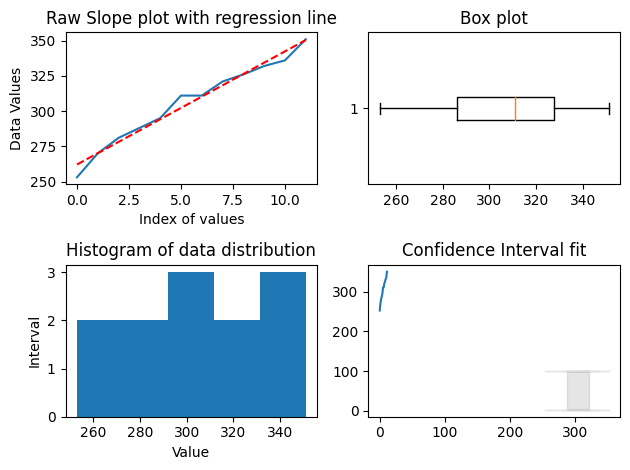

In [3]:
### START PREP ###

# clean up the data
clean = single_dim_num_regex(data)


## LOAD DATA INTO COMMON DATA MODELS ##

# make pandas df and sort it from low to high
df = pd.Series(clean).sort_values().reset_index(drop=True)
array = np.array(clean)

## END LOAD DATA INTO COMMON DATA MODELS ##

### END PREP ###


### START CALCULATIONS ###

overview = st.describe(clean)
count_array = np.arange(df.count())

# calculate mx+b
m, b = np.polyfit(count_array, df.to_numpy(), 1)

# standard deviation with 1 degree of freedom
std = array.std(ddof=1)

# Zscore from Confidence interval
ci_z = st.norm.pdf(ci)

### END CALCULATIONS ###


### START OUTPUT ###

## START GRAPHING ##
fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)

# chart out raw data value and regression (Grid Pos 0,0)
axis = fig.add_subplot(gs[0, 0])
axis.plot(df)
axis.set_title("Raw Slope plot with regression line")
axis.set_ylabel("Data Values")
axis.set_xlabel("Index of values")
axis.plot(count_array, (m*count_array)+b, linestyle="dashed", color="red")

# Box plot of data
axis = fig.add_subplot(gs[0, 1])
axis.boxplot(array, vert=False)
axis.set_title("Box plot")

# Value distribution histogram
axis = fig.add_subplot(gs[1, 0])
axis.hist(array,bins=bin_count,linewidth=0.5)
axis.set_title("Histogram of data distribution")
axis.set_ylabel("Interval")
axis.set_xlabel("Value")

# Confidence interval mapped onto slope
axis = fig.add_subplot(gs[1, 1])
axis.plot(df)
axis.set_title("Confidence Interval fit")
axis.fill_between(array,100,2, color="black",alpha=.1)

## END GRAPHING ##

## START PRINTING ##
print("--Overview--")
print(f"Samples: {overview.nobs}")
print(f"Min: {overview.minmax[0]}")
print(f"25% Percentile: {overview.minmax[0]}")
print(f"Max: {overview.minmax[1]}")
print(f"Mean: {overview.mean}")
print(f"Standard deviation: {round(std,round_to)}")
#print(f"CDF(Cumulative Distribution Function): {st.norm.cdf(x=data)}")
## END PRINTING ##